Por cada litro de gasolina consumido, un coche emite en promedio 2,35 kg de CO2 y por cada litro de gasóleo, unos 2,64 kg de CO2.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
co2=pd.read_csv('./data/CO2_Emissions_Canada.csv')
cars=pd.read_csv('./data/USA_cars_datasets.csv')


In [3]:
co2=co2.rename(columns={'Make':'fabricante',
                    "Model":"modelo"})

cars=cars.rename(columns={'brand':'fabricante',
                        'model':'modelo'})

In [4]:
cars['fabricante']=cars['fabricante'].map(lambda x :x.lower())
cars['modelo']=cars['modelo'].map(lambda x :x.lower())
co2['fabricante']=co2['fabricante'].map(lambda x :x.lower())
co2['modelo']=co2['modelo'].map(lambda x :x.lower())

In [5]:
junte= co2.merge(cars, on=['fabricante','modelo'])


In [6]:
evolucion=junte.groupby(['Fuel Type','year'])[['Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)']].mean()

### Cribamos los datos para que existan datos para todos los combustibles

In [7]:
###evolucion.loc[('X',1973)]            Forma de acceder a un multiindice
l=[]
for i in evolucion.index:
    if(i[1]>2014):
        l.append(i)
cribado=evolucion[evolucion.index.isin(l)]

p=cribado.reset_index().set_index('Fuel Type')


X = Regular gasoline

Z = Premium gasoline

D = Diesel

E = Ethanol (E85)

N = Natural gas


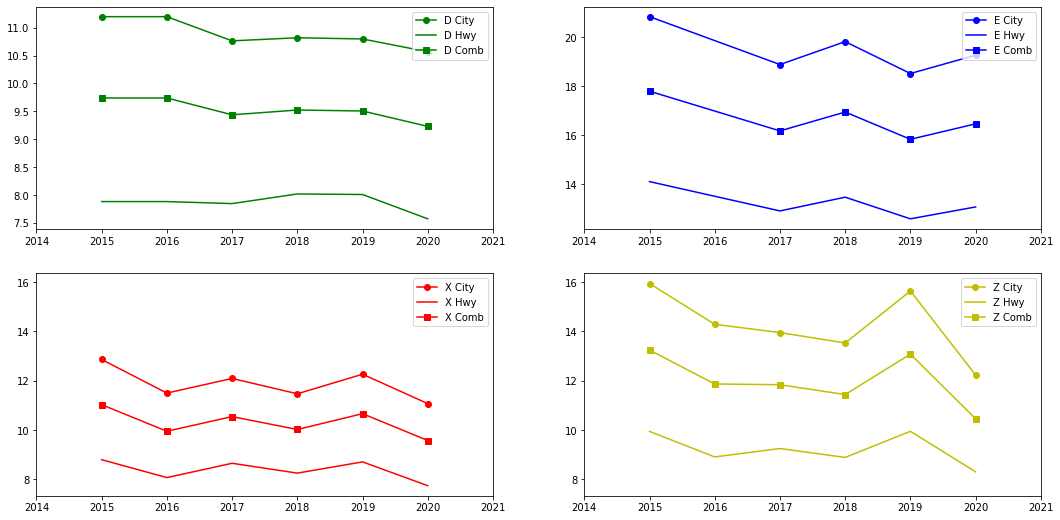

In [8]:
plt.subplots(figsize=(18,9))
plt.subplot(221)
grupo=list(p.index.unique())

i=0
j=0
colors=['go-','g-','gs-','bo-','b-','bs-','ro-','r-','rs-','yo-','y-','ys-']
# equivalent but more general
ax1 = plt.subplot(2, 2, 1)
ax1.plot(p.loc[grupo[i]]['year'],p.loc[grupo[i]]['Fuel Consumption City (L/100 km)'],colors[j],label=grupo[i]+" City")
j+=1
ax1.plot(p.loc[grupo[i]]['year'],p.loc[grupo[i]]['Fuel Consumption Hwy (L/100 km)'],colors[j],label=grupo[i]+" Hwy")
j+=1
ax1.plot(p.loc[grupo[i]]['year'],p.loc[grupo[i]]['Fuel Consumption Comb (L/100 km)'],colors[j],label=grupo[i]+" Comb")
j+=1


plt.legend(loc='upper right')
plt.xlim(2014,2021)

i+=1

# add a subplot with no frame
ax2 = plt.subplot(222)
ax2.plot(p.loc[grupo[i]]['year'],p.loc[grupo[i]]['Fuel Consumption City (L/100 km)'],colors[j],label=grupo[i]+" City")
j+=1
ax2.plot(p.loc[grupo[i]]['year'],p.loc[grupo[i]]['Fuel Consumption Hwy (L/100 km)'],colors[j],label=grupo[i]+" Hwy")
j+=1
ax2.plot(p.loc[grupo[i]]['year'],p.loc[grupo[i]]['Fuel Consumption Comb (L/100 km)'],colors[j],label=grupo[i]+" Comb")
j+=1
plt.legend(loc='upper right')
plt.xlim(2014,2021)

i+=1

# add a polar subplot
ax3=plt.subplot(223)
ax3.plot(p.loc[grupo[i]]['year'],p.loc[grupo[i]]['Fuel Consumption City (L/100 km)'],colors[j],label=grupo[i]+" City")
j+=1
ax3.plot(p.loc[grupo[i]]['year'],p.loc[grupo[i]]['Fuel Consumption Hwy (L/100 km)'],colors[j],label=grupo[i]+" Hwy")
j+=1
ax3.plot(p.loc[grupo[i]]['year'],p.loc[grupo[i]]['Fuel Consumption Comb (L/100 km)'],colors[j],label=grupo[i]+" Comb")
j+=1
plt.legend(loc='upper right')
plt.xlim(2014,2021)

i+=1


# add a red subplot that shares the x-axis with ax1
ax4=plt.subplot(224,sharex=ax2,sharey=ax3)

ax4.plot(p.loc[grupo[i]]['year'],p.loc[grupo[i]]['Fuel Consumption City (L/100 km)'],colors[j],label=grupo[i]+" City")
j+=1
ax4.plot(p.loc[grupo[i]]['year'],p.loc[grupo[i]]['Fuel Consumption Hwy (L/100 km)'],colors[j],label=grupo[i]+" Hwy")
j+=1
ax4.plot(p.loc[grupo[i]]['year'],p.loc[grupo[i]]['Fuel Consumption Comb (L/100 km)'],colors[j],label=grupo[i]+" Comb")
plt.legend(loc='upper right')
plt.xlim(2014,2021);




